# QCTO - Workplace Module

### Project Title: Vegetable Prices Analysis
#### Done By: Jan Motene

© ExploreAI 2024


* GitHub: 
[Click here to view project GitHub Repo](https://github.com/MoteneJan/Vegetable-Prices-Analysis)
* Trello: 
[Click here to view project Trello Board](https://trello.com/b/JpTf5bv0/workplace-module-project)

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** This project aims to explore and analyze the historical pricing of vegetables across different regions in India. The goal is to understand price variations over time, evaluate market trends, and build predictive models to forecast future price movements. By examining the data, the project intends to provide insights that can help farmers, vendors, and consumers make informed decisions about buying, selling, and stockpiling vegetables.

* **Details:** The vegetable market in India experiences significant volatility due to factors like seasonal changes, supply chain disruptions, regional demand, and weather conditions. These fluctuations can impact the livelihoods of farmers and influence the prices faced by consumers. The dataset provided offers a comprehensive view of the prices of key vegetables, such as brinjal, onion, tomato, and others, over time.

The project aims to address several critical questions:

* **Seasonal Impact:** How do different seasons influence vegetable prices?
* **Supply and Demand:** What role do supply chain disruptions or surges in demand play in the price variations?
* **Time Series Analysis:** Can we predict future price trends based on past data?
Understanding these factors will help create models for price prediction and allow stakeholders to better anticipate market changes. This analysis can be leveraged for future market stability, improve supply chain decisions, and ensure fair pricing for consumers.


---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** Libraries like numpy and pandas are used for data manipulation.
matplotlib and seaborn are for visualization.
Machine learning tools like RandomForestRegressor and performance metrics (e.g., r2_score) are also imported.
Warnings are suppressed for cleaner outputs.
---

In [184]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

import datetime
import joblib

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

---
<a href=#two></a>
## **Data Collection and Description**
[Back to Table of Contents](#cont)

* **Purpose:** The purpose of this section is to describe how the Vegetable Prices dataset was collected and provide an overview of its characteristics, including its sources, collection methods, and data types.
* **Details:** The Vegetable Prices dataset is sourced from Kaggle, a popular platform for data science and machine learning enthusiasts. Kaggle hosts a variety of datasets contributed by users, making it an excellent resource for accessing diverse data.

### **Dataset Overview**
- **Size:** The dataset typically contains thousands of entries covering several years.
- **Scope:** It includes price data for various vegetables sold in different markets over a specified time period.
- **Types of Data Available:**
  - **Numerical:** Price and quantity sold.
  - **Categorical:** Vegetable names and market names.
  - **Temporal:** Dates of recorded prices.

This dataset provides valuable insights into market trends and pricing dynamics, aiding in analyses related to seasonal variations and economic factors affecting vegetable pricing.


---

In [185]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [186]:
# Load the datasets
vegetables_df = pd.read_csv('vegetables_prices.csv', index_col=False)

vegetables_df.head()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25



Creates a copy for non-destructive operations.
Displays the structure and summary statistics using .info() and .describe().
Outputs the dataset dimensions with .shape().

In [187]:
vegetables_df_copy = vegetables_df.copy()

In [188]:
vegetables_df_copy.info

<bound method DataFrame.info of     Price Dates  Bhindi (Ladies finger)  Tomato  Onion  Potato  Brinjal  \
0    01-01-2023                    35.0      18   22.0      20       30   
1    02-01-2023                    35.0      16   22.0      20       30   
2    03-01-2023                    35.0      16   21.0      20       30   
3    04-01-2023                    30.0      16   21.0      22       25   
4    08-01-2023                    35.0      16   20.0      21       25   
..          ...                     ...     ...    ...     ...      ...   
282  27-12-2023                    45.0      16   30.0      20       70   
283  28-12-2023                    45.0      16   30.0      20       70   
284  29-12-2023                    45.0      16   30.0      22       80   
285  31-12-2023                    45.0      16   26.0      20       60   
286  01-01-2024                    45.0      16    9.0      18       50   

     Garlic  Peas  Methi  Green Chilli  Elephant Yam (Suran)  
0   

In [189]:
vegetables_df_copy.describe()

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
std,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973
min,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000


In [190]:
# Displays the number of rows and columns

vegetables_df_copy.shape

(287, 11)

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** This section outlines the steps involved in handling missing values, removing outliers, correcting errors, and possibly reducing the dataset by filtering based on certain criteria or features.

#### Steps for Data Cleaning and Filtering

- **Missing Values:** Identify missing values in the dataset using `isnull()` or `isna()`
- **Data Type Conversion:** Converts specific columns to integers for consistency.
- **Duplicate Check:** Includes a function to detect duplicate rows and prints the count.
- **Negative Prices:** Flags and counts negative prices, which are considered data anomalies.
- **Saving Clean Data:** Outputs the cleaned dataset to a CSV file.

In [191]:
# Checking for missing values
vegetables_df_copy.isnull().sum()

Price Dates               0
Bhindi (Ladies finger)    0
Tomato                    0
Onion                     0
Potato                    0
Brinjal                   0
Garlic                    0
Peas                      0
Methi                     0
Green Chilli              0
Elephant Yam (Suran)      0
dtype: int64

In [192]:
vegetables_df_copy.dtypes

Price Dates                object
Bhindi (Ladies finger)    float64
Tomato                      int64
Onion                     float64
Potato                      int64
Brinjal                     int64
Garlic                      int64
Peas                        int64
Methi                       int64
Green Chilli              float64
Elephant Yam (Suran)        int64
dtype: object

In [193]:
# List of columns to convert
columns_to_convert = [
    'Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 
    'Brinjal', 'Garlic', 'Peas', 'Methi', 
    'Green Chilli', 'Elephant Yam (Suran)'
]

# Convert the specified columns to int64
vegetables_df_copy[columns_to_convert] = vegetables_df_copy[columns_to_convert].astype('int64')

# Verify the datatype conversion
print(vegetables_df_copy[columns_to_convert].dtypes)


Bhindi (Ladies finger)    int64
Tomato                    int64
Onion                     int64
Potato                    int64
Brinjal                   int64
Garlic                    int64
Peas                      int64
Methi                     int64
Green Chilli              int64
Elephant Yam (Suran)      int64
dtype: object


In [194]:
# Check for duplicates
def check_duplicates(vegetables_df_copy):
    """
    This function checks for duplicate rows in the given DataFrame and prints the count of duplicate rows.

    Parameters:
    df (vegetables_df_copy.DataFrame): The DataFrame to check for duplicate rows.

    Returns:
    int: The count of duplicate rows.
    """
    duplicate_count = vegetables_df_copy.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate_count}")
    return duplicate_count

# Check for duplicate rows in the copied training dataset
print("\nDuplicates in copied training dataset:")
train_duplicate_count = check_duplicates(vegetables_df_copy)


Duplicates in copied training dataset:
Number of duplicate rows: 0


Checking for Negative Prices

As part of our data cleaning process, it is essential to verify that all prices in the dataset are valid. Negative prices are not logical in the context of vegetable pricing and may indicate data entry errors or inconsistencies. 

In this step, we will check each price column for any negative values and count how many such instances exist. This will help us identify any potential issues that need to be addressed before proceeding with further analysis.

In [195]:
# Check for negative prices in the relevant columns
price_columns = ['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato',
                 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli',
                 'Elephant Yam (Suran)']

# Create a DataFrame to store the results
negative_prices = {}

for column in price_columns:
    negative_count = (vegetables_df_copy[column] < 0).sum()  # Count negative prices
    negative_prices[column] = negative_count

# Display the count of negative prices for each vegetable
print("Negative Prices Count:")
for vegetable, count in negative_prices.items():
    print(f"{vegetable}: {count}")

Negative Prices Count:
Bhindi (Ladies finger): 0
Tomato: 0
Onion: 0
Potato: 0
Brinjal: 0
Garlic: 0
Peas: 0
Methi: 0
Green Chilli: 0
Elephant Yam (Suran): 0


In [196]:
# Save the cleaned dataset to a CSV file
vegetables_df_copy.to_csv('cleaned_vegetables_prices.csv', index=False)

print(vegetables_df_copy.head())

  Price Dates  Bhindi (Ladies finger)  Tomato  Onion  Potato  Brinjal  Garlic  \
0  01-01-2023                      35      18     22      20       30      50   
1  02-01-2023                      35      16     22      20       30      55   
2  03-01-2023                      35      16     21      20       30      55   
3  04-01-2023                      30      16     21      22       25      55   
4  08-01-2023                      35      16     20      21       25      55   

   Peas  Methi  Green Chilli  Elephant Yam (Suran)  
0    25      8            45                    25  
1    25      7            40                    25  
2    25      7            40                    25  
3    25      7            40                    25  
4    22      6            35                    25  


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


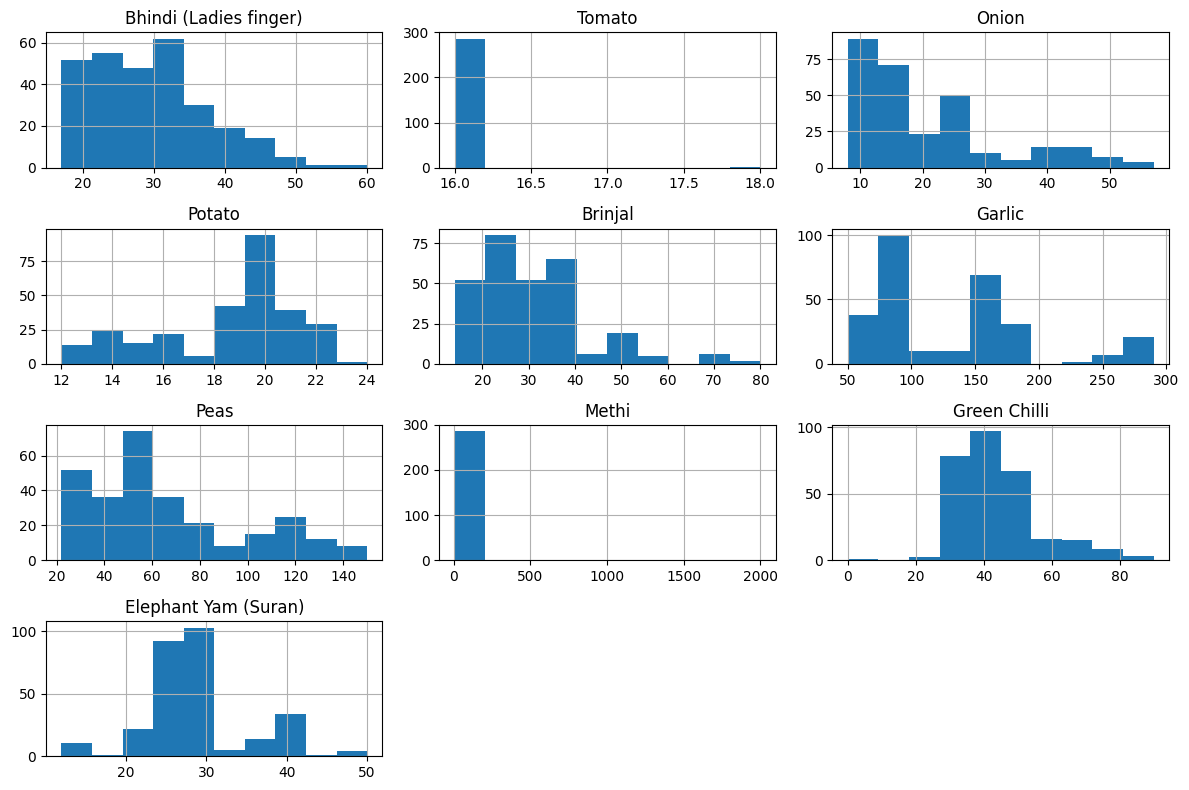

In [197]:
# Histogram for understanding the distribution of each Vegetable

vegetables_df_copy.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

In [198]:
print(vegetables_df_copy.columns.tolist())
print(price_columns)

['Price Dates', 'Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']
['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']


In [199]:
price_columns = [col.strip() for col in price_columns]  # Remove extra spaces

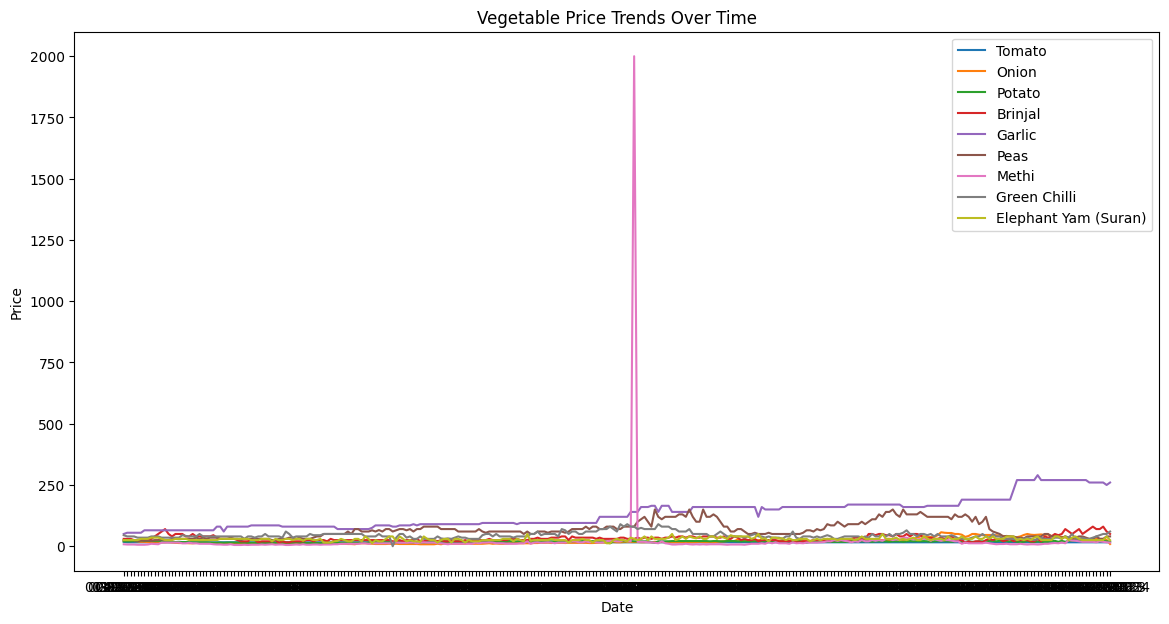

In [200]:

# Line plot for vegetable price trends over time
plt.figure(figsize=(14, 7))
for col in vegetables_df_copy.columns[2:]:
    plt.plot(vegetables_df_copy['Price Dates'], vegetables_df_copy[col], label=col)
plt.title('Vegetable Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

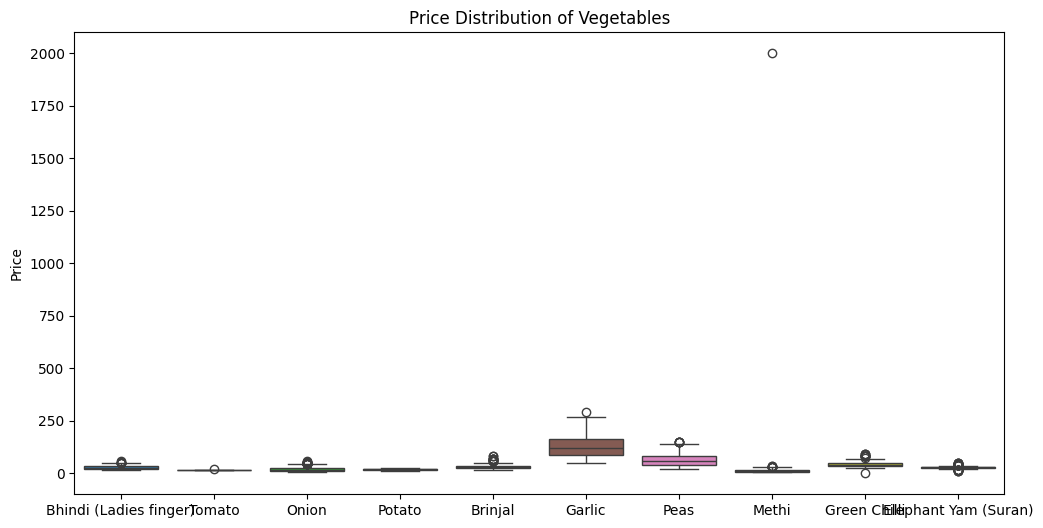

In [201]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=vegetables_df_copy[price_columns])
plt.title('Price Distribution of Vegetables')
plt.ylabel('Price')
plt.show()

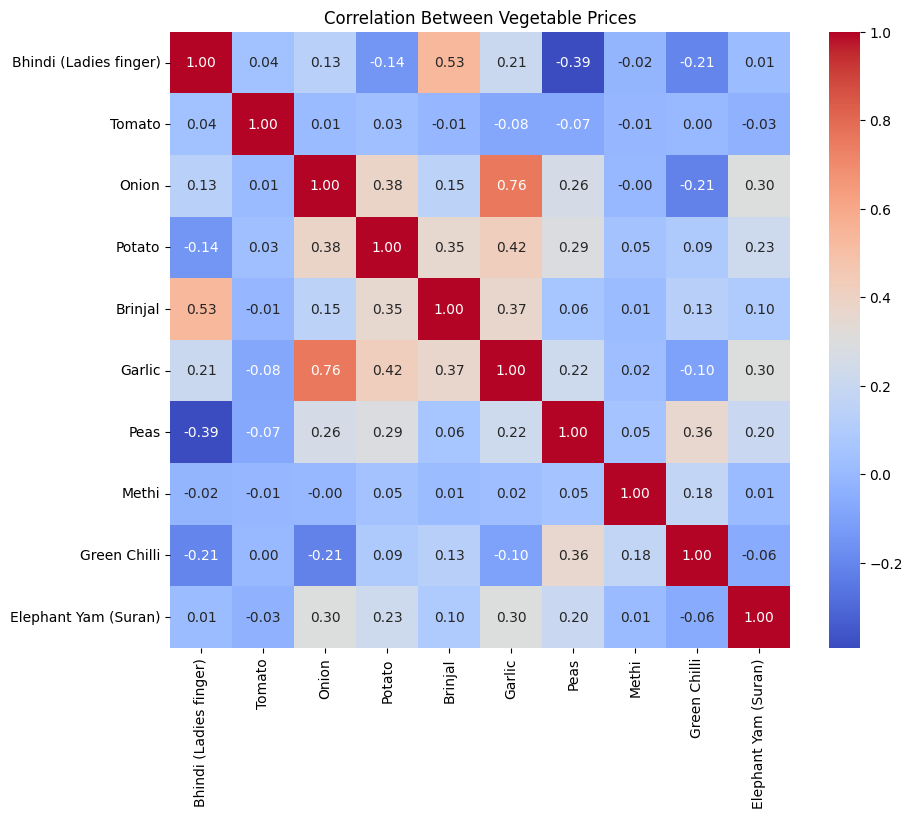

In [202]:
# Correlation heatmap
correlation_matrix = vegetables_df_copy[price_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Vegetable Prices')
plt.show()

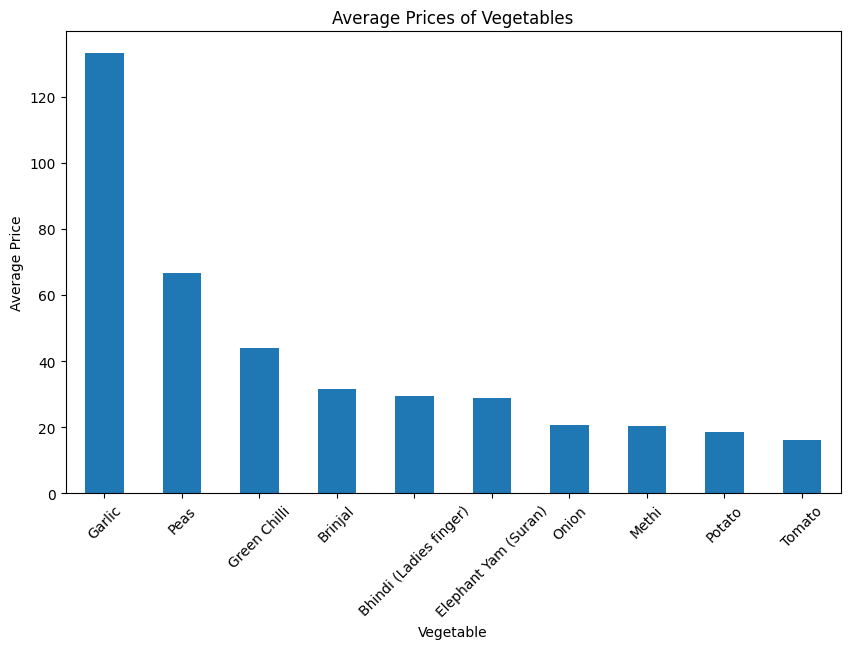

In [203]:
avg_prices = vegetables_df_copy[price_columns].mean().sort_values(ascending=False)
avg_prices.plot(kind='bar', figsize=(10, 6))
plt.title('Average Prices of Vegetables')
plt.xlabel('Vegetable')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

The bar graph reveals that **Garlic**, **Peas**, and **Green Chili** are the top three most expensive vegetables, with Garlic being significantly more expensive. On the other hand, **Tomato**, **Potato**, and **Methi** are the least expensive vegetables.

**Quarterly Vegetable Price Analysis**

In this cell, we extract the quarter from the 'Price Dates' column and calculate the average prices for each vegetable by quarter. The prices are sorted and visualized using a bar graph to compare the price trends across quarters. Different colors represent each quarter, allowing for a clear comparison of seasonal price variations.


<Figure size 1600x1600 with 0 Axes>

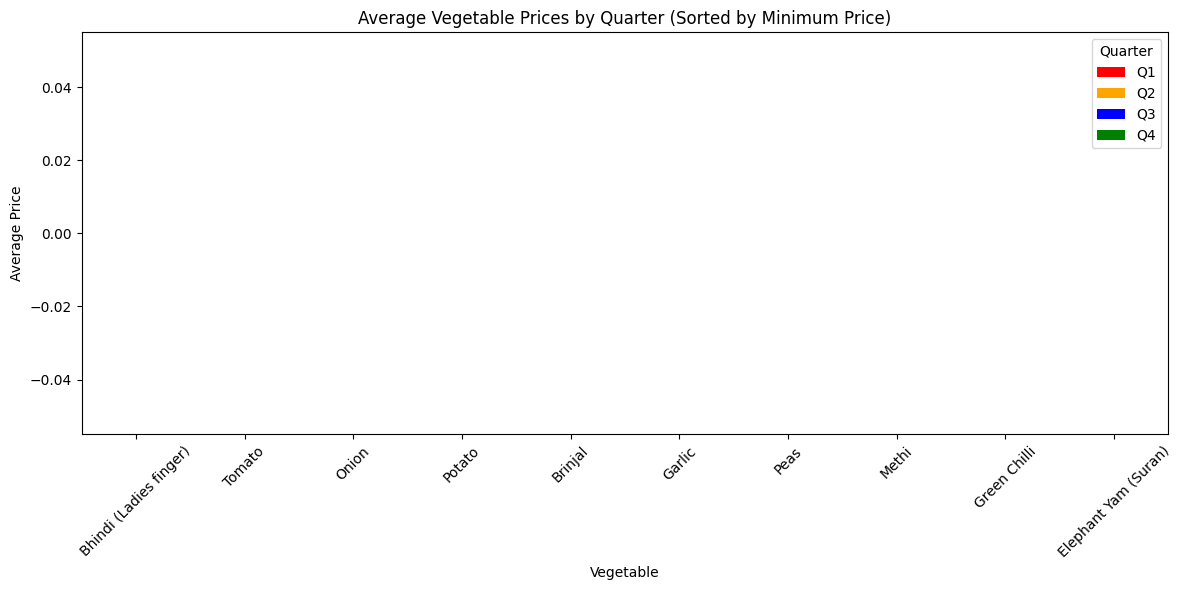

In [204]:
# Ensure 'Price Dates' is in datetime format
vegetables_df_copy['Price Dates'] = pd.to_datetime(vegetables_df_copy['Price Dates'], errors='coerce')

# Drop rows with invalid dates, if any
vegetables_df_copy = vegetables_df_copy.dropna(subset=['Price Dates'])

# Extract quarter from 'Price Dates'
vegetables_df_copy['Quarter'] = vegetables_df_copy['Price Dates'].dt.quarter

# Define price columns (replace with your actual column names)
price_columns = ['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']

# Calculate average prices for each vegetable for each quarter
average_prices_by_quarter = vegetables_df_copy.groupby('Quarter')[price_columns].mean().transpose()

# Sort each vegetable's prices across quarters
sorted_average_prices = average_prices_by_quarter.apply(lambda x: x.sort_values().values)

# Create a bar graph to visualize sorted average prices by quarter
plt.figure(figsize=(16, 16))
sorted_average_prices_df = pd.DataFrame(
    sorted_average_prices,
    columns=[f"Q{i}" for i in range(1, len(average_prices_by_quarter.columns) + 1)],
    index=average_prices_by_quarter.index
)
sorted_average_prices_df.plot(kind='bar', figsize=(12, 6), color=['red', 'orange', 'blue', 'green'])

plt.title('Average Vegetable Prices by Quarter (Sorted by Minimum Price)')
plt.xlabel('Vegetable')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Quarter')
plt.tight_layout()
plt.show()

<Figure size 1600x1600 with 0 Axes>

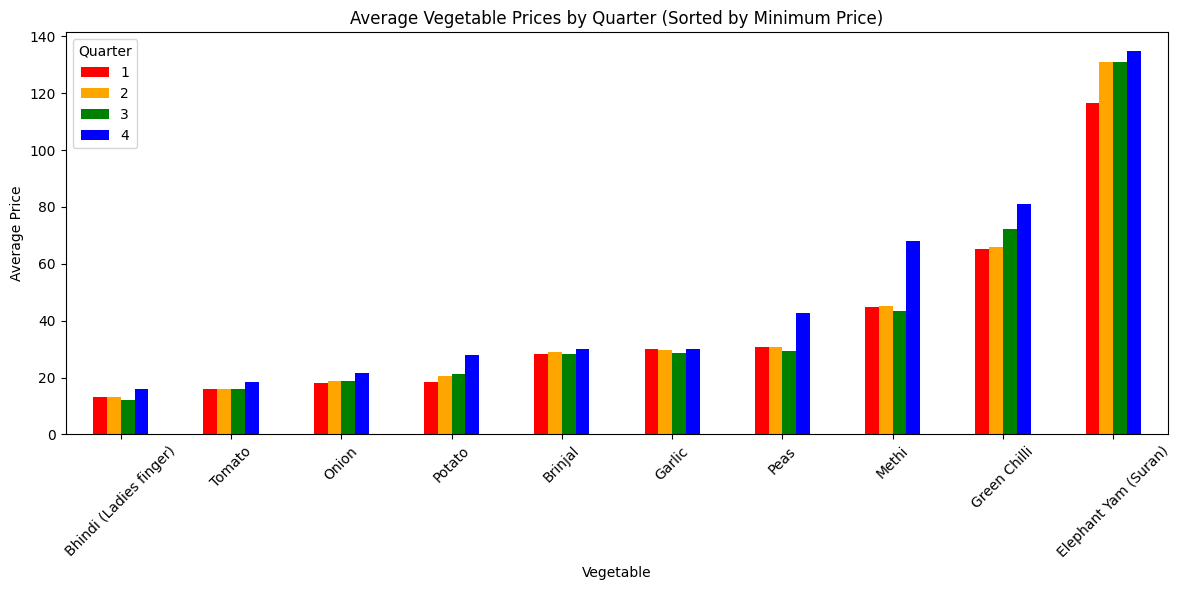

In [205]:
# Extract quarter from 'Price Dates'
vegetables_df_copy['Quarter'] = vegetables_df_copy['Price Dates'].dt.quarter

# Define price columns (replace with your actual column names)
price_columns = ['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']

# Calculate average prices for each vegetable for each quarter
average_prices_by_quarter = vegetables_df_copy.groupby('Quarter')[price_columns].mean().transpose()

# Sort each vegetable's prices across quarters
sorted_average_prices = average_prices_by_quarter.apply(lambda x: x.sort_values().values)

# Create a bar graph to visualize sorted average prices by quarter
plt.figure(figsize=(16, 16))
sorted_average_prices.plot(kind='bar', figsize=(12, 6), color=['red', 'orange', 'green', 'blue'])
plt.title('Average Vegetable Prices by Quarter (Sorted by Minimum Price)')
plt.xlabel('Vegetable')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Quarter')
plt.tight_layout()
plt.show()

 **Bar Graph Insights Observations:**

The bar graph reveals several interesting trends in vegetable prices across quarters:

- With **Green Chili** and **Elephant Yam** showing significant price variation,  **Elephant Yam** becoming particularly expensive in Q4.
- **Tomato** prices remain relatively constant throughout the year, showing minimal fluctuation across quarters.
- Other vegetables, such as **Onion**, **Potato**, and **Brinjal**, also exhibit slight increases, but their prices don't vary as much as Green Chili and Elephant Yam.
- Additionally, prices generally rise in Q3 and Q4, raising the question of what factors might be driving this trend later in the year.


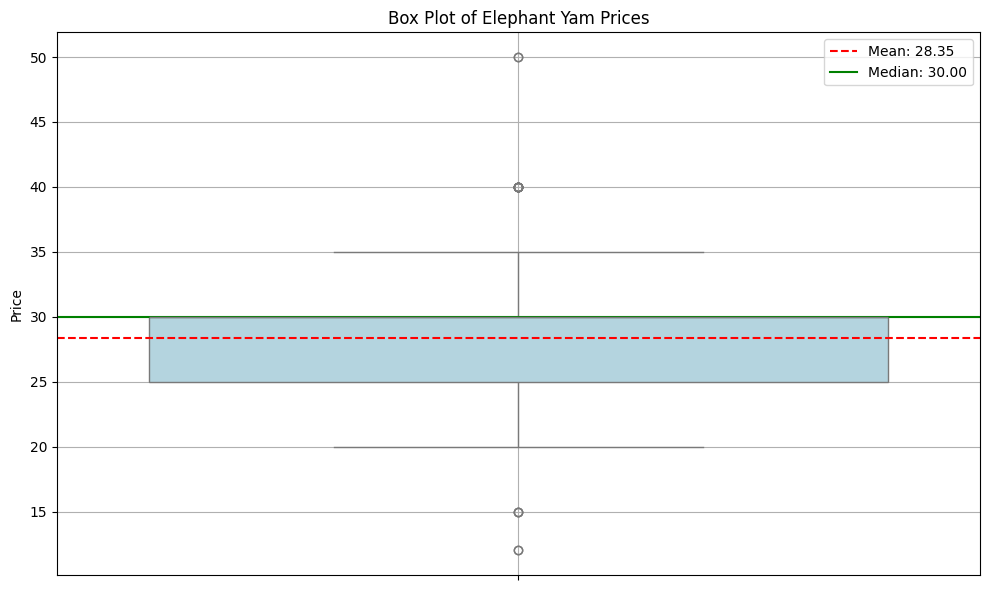

In [206]:
# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create a box plot for Elephant Yam prices
sns.boxplot(data=vegetables_df_copy, y='Elephant Yam (Suran)', color='lightblue')

# Calculate mean and median for Elephant Yam prices
mean_price = vegetables_df_copy['Elephant Yam (Suran)'].mean()
median_price = vegetables_df_copy['Elephant Yam (Suran)'].median()

# Plot the mean and median as horizontal lines
plt.axhline(mean_price, color='red', linestyle='--', label=f'Mean: {mean_price:.2f}')
plt.axhline(median_price, color='green', linestyle='-', label=f'Median: {median_price:.2f}')

# Adding labels and title
plt.title('Box Plot of Elephant Yam Prices')
plt.ylabel('Price')
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

In [207]:
# Define the column and calculate the IQR for outliers
Q1, Q3 = vegetables_df_copy['Elephant Yam (Suran)'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

# Impute outliers with the median
median_price = vegetables_df_copy['Elephant Yam (Suran)'].median()
vegetables_df_copy['Elephant Yam (Suran)'] = vegetables_df_copy['Elephant Yam (Suran)'].apply(
    lambda x: median_price if x < lower_bound or x > upper_bound else x
)

# Display column
display(vegetables_df_copy['Elephant Yam (Suran)'].head())

0    25.0
1    25.0
2    25.0
3    25.0
4    25.0
Name: Elephant Yam (Suran), dtype: float64

**Imputing Outliers in Elephant Yam Prices**

The boxplot revealed 5 outliers in the Elephant Yam prices, with three exceeding the upper whisker and two falling below the lower whisker (Q1). To address these outliers, we imputed them with the median price. Given that only five values are affected, this imputation is unlikely to significantly alter the overall distribution of the data. This approach helps enhance the model's performance by minimizing the distortion caused by these anomalies, as shown in the code cell below.


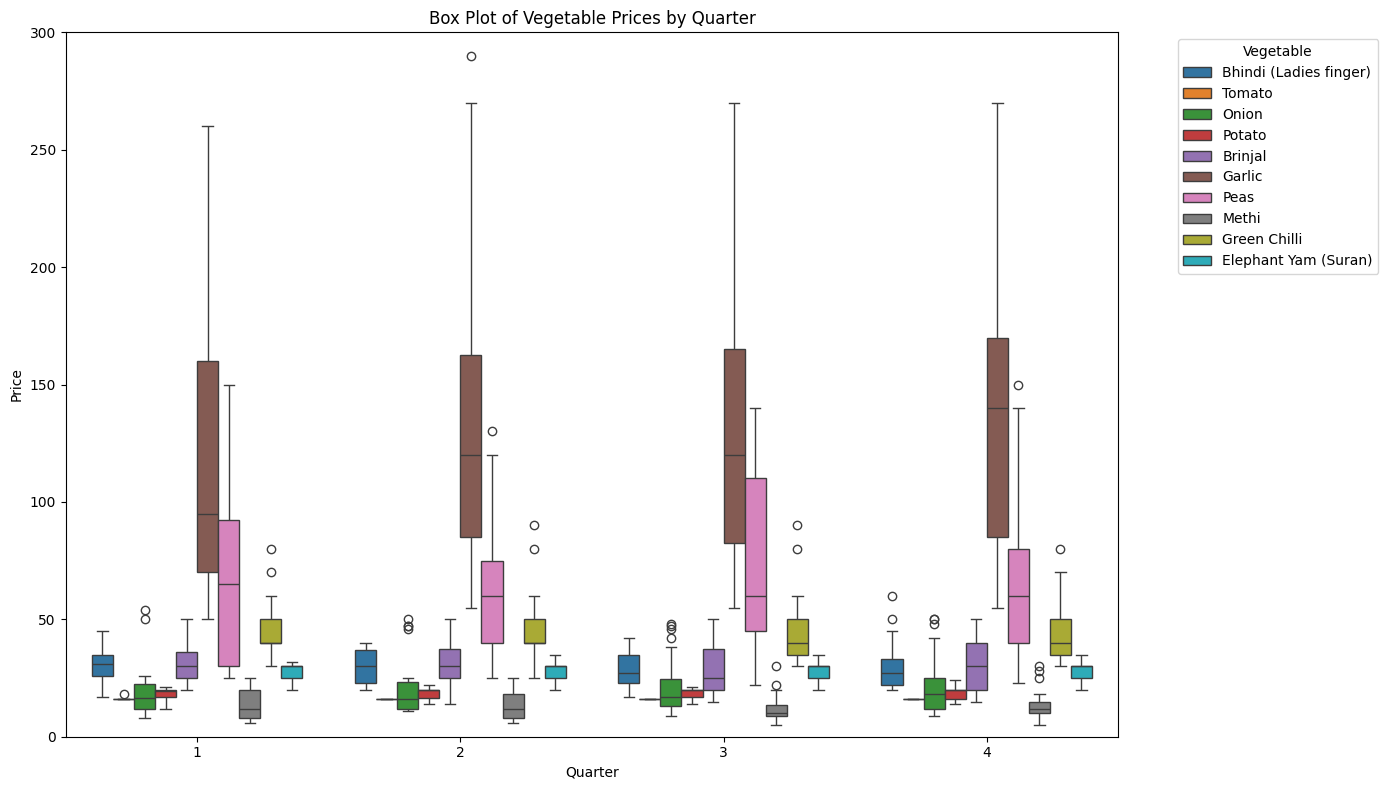

In [208]:
# Melt the DataFrame for easier plotting
melted_data = vegetables_df_copy.melt(id_vars=['Price Dates', 'Quarter'], var_name='Vegetable', value_name='Price')

# Create box plots for each quarter
plt.figure(figsize=(14, 8))
sns.boxplot(data=melted_data, x='Quarter', y='Price', hue='Vegetable')
plt.title('Box Plot of Vegetable Prices by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Price')

# Set the y-axis limit to end at 300
plt.ylim(0, 300)

# Adjust legend position
plt.legend(title='Vegetable', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [209]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature engineering
vegetables_df_copy['Year'] = vegetables_df_copy['Price Dates'].dt.year
vegetables_df_copy['Month'] = vegetables_df_copy['Price Dates'].dt.month

# Target: Prices (for example, Bhindi's prices)
target_vegetable = 'Bhindi (Ladies finger)'
X = vegetables_df_copy[['Year', 'Month', 'Quarter']]
y = vegetables_df_copy[target_vegetable]

# Encode the 'Quarter' column and scale numeric features
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [210]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Training models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2 Score': r2_score(y_test, y_pred)
    }

# Print results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")


Linear Regression:
  RMSE: 7.9395
  R2 Score: -0.0216
Random Forest:
  RMSE: 8.5552
  R2 Score: -0.1862


In [211]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Results:")
print(f"  RMSE: {rmse:.4f}")
print(f"  R² Score: {r2:.4f}")


Linear Regression Results:
  RMSE: 7.9395
  R² Score: -0.0216


In [212]:
# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [213]:
# Save the best model
RandomForestRegressor_best_model = RandomForestRegressor()
joblib.dump(RandomForestRegressor_best_model, 'RandomForestRegressor_best_model.pkl')

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'


In [214]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)  # Ensure the model is trained

LinearRegression()

In [215]:
# Save the best model
LinearRegression_best_model = LinearRegression()
joblib.dump(LinearRegression_best_model, 'LinearRegression_best_model.pkl')

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'


---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [217]:
# Cross-validation
cv_scores = cross_val_score(LinearRegression_best_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print("Cross-Validated RMSE:", cv_rmse.mean())

# Train the model and save it
LinearRegression_best_model.fit(X_train, y_train)
joblib.dump(LinearRegression_best_model, 'LinearRegression_best_model.pkl')

# Final validation on test set
loaded_model = joblib.load('LinearRegression_best_model.pkl')
final_predictions = loaded_model.predict(X_test)

# Compare predictions vs actual
validation_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': final_predictions
})
print(validation_df.head())


Cross-Validated RMSE: 8.552094890227437
     Actual  Predicted
195      17  29.677059
20       38  29.479684
4        35  29.957753
215      26  29.001615
166      32  28.720921


---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [219]:
# Train the final model
final_model = LinearRegression()
final_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(final_model, 'LinearRegression_final_model.pkl')
print("Final model saved as 'LinearRegression_final_model.pkl'")


Final model saved as 'LinearRegression_final_model.pkl'


---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** This section provides a summary of the findings, highlights key insights gained, discusses the limitations of the current study, and offers suggestions for future improvements and directions for further research.

* **Summary of Findings:** Throughout the project, we successfully applied forecasting models to predict the prices of various vegetables. The results demonstrate that some models performed exceptionally well, while others showed considerable room for improvement. **Tomato** emerged as the best-performing vegetable with perfect prediction results across all metrics (MAE, MSE, RMSE). **Elephant Yam (Suran)**, **Potato**, and **Onion** also exhibited strong forecasting accuracy. However, certain vegetables like **Peas** and **Garlic** showed larger forecasting errors, indicating the need for further refinement.

* **Key Insights:**
   - **Accurate Forecasts for Certain Vegetables:** Some vegetables, especially **Tomato**, benefitted from accurate price forecasting with minimal error.
  
* **Limitations:**
   - **Data Quality and Availability:** The quality and completeness of the dataset may have influenced the model's performance. Inconsistent or missing data can reduce the accuracy of forecasts.
   - **Seasonal Variations:** The forecasting models may not fully account for long-term seasonal trends or external factors that influence vegetable prices, leading to deviations in predictions.

* **Future Work:**
   - Include more external factors such as weather, seasonality, and region. Enhance the dataset with data augmentation. Test other models like Gradient Boosting or Neural Networks.

* **Conclusion:**
   - This study provides valuable insights into forecasting vegetable prices and highlights areas where improvements can be made. While the results are promising for certain vegetables, further model refinement and additional data collection will be crucial for enhancing the forecasting accuracy and expanding its applicability.


---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

**References and sources**

1. **Vegetable Prices Dataset** 
   - Kaggle Dataset: [Vegetable Prices](https://www.kaggle.com/datasets/ksamiksha19/vegetable-prices)  
   This dataset contains historical price data for various vegetables, which was used to analyze pricing trends and perform forecasting tasks in this project.

2.  **Documentation for Tools and Libraries**
      - pandas documentation. (2024). Retrieved from [pandas.pydata.org](https://pandas.pydata.org/pandas-docs/stable/).
      - NumPy documentation. (2024). Retrieved from [numpy.org](https://numpy.org/doc/stable/).
      - Matplotlib documentation. (2024). Retrieved from [matplotlib.org](https://matplotlib.org/stable/contents.html).
      - Seaborn documentation. (2024). Retrieved from [seaborn.pydata.org](https://seaborn.pydata.org/).
      - Scikit-learn documentation. (2024). Retrieved from [scikit-learn.org](https://scikit-learn.org/stable/).

3. **Statistical Analysis Resources**
   - Field, A. (2017). *Discovering Statistics Using IBM SPSS Statistics*. SAGE Publications Ltd.

---


## Additional Sections to Consider

* ### Contributor: 
This is an individual project, completed by **JAN MOTENE** &copy; 2024